In [ ]:
#!pip3 install torch
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-07-17 04:45:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.3.127.107, 34.238.5.126, 3.223.118.45, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.3.127.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.13M  39.8MB/s    in 0.3s    

2020-07-17 04:45:59 (39.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np # linear algebra
%tensorflow_version 1.x
import tensorflow as tf
import torch
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
#MinMaxScalar is used to normalize the value before training
#is used to deal with the data after train and split as data will be in form of aray for training and testing.
from keras.models import Sequential
#keras has 2 models one is functional and another is sequential
from keras.layers import Dense
#Dense layer is the output layer
from keras.layers import LSTM
#library used to calculate the mean square error. For classification accuracy is calculated and for regression mean square error is calculated
import math, os
from sklearn.metrics import mean_squared_error

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive

'My Drive'


In [ ]:
#%cd /content/drive/My\ Drive/Mount

In [ ]:
!ls

drive				seg_00030f.csv	seg_004f1f.csv	seg_00e5f7.csv
log				seg_0012b5.csv	seg_00648a.csv	seg_00f3b9.csv
ngrok				seg_00184e.csv	seg_006e4a.csv	seg_010eab.csv
ngrok-stable-linux-amd64.zip	seg_003339.csv	seg_007a37.csv	seg_0125d9.csv
ngrok-stable-linux-amd64.zip.1	seg_0042cc.csv	seg_00a37e.csv	train.csv
ngrok-stable-linux-amd64.zip.2	seg_004314.csv	seg_00be11.csv	train.csv.zip
sample_data			seg_004cd2.csv	seg_00c35b.csv
sample_submission.csv		seg_004ee5.csv	seg_00cc91.csv


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c LANL-Earthquake-prediction

seg_004ee5.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00cc91.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00a37e.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_0012b5.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00be11.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00f3b9.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_004314.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_004cd2.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00030f.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00648a.csv: Skipping, found more recently modified local copy (use --force to force download)
seg_00c35b.csv: Skip

In [ ]:
!ls

drive				seg_00030f.csv	seg_004f1f.csv	seg_00e5f7.csv
log				seg_0012b5.csv	seg_00648a.csv	seg_00f3b9.csv
ngrok				seg_00184e.csv	seg_006e4a.csv	seg_010eab.csv
ngrok-stable-linux-amd64.zip	seg_003339.csv	seg_007a37.csv	seg_0125d9.csv
ngrok-stable-linux-amd64.zip.1	seg_0042cc.csv	seg_00a37e.csv	train.csv
ngrok-stable-linux-amd64.zip.2	seg_004314.csv	seg_00be11.csv	train.csv.zip
sample_data			seg_004cd2.csv	seg_00c35b.csv
sample_submission.csv		seg_004ee5.csv	seg_00cc91.csv


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
from keras.callbacks import *
filepath = "/content/drive/My Drive/Epochs/epochs:{epoch:03d}.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False , mode='max')
callbacks_list = [checkpoint]


In [ ]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6008 &'
    .format(LOG_DIR)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6008 &')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv',nrows=5500000,dtype={'acoustic_data': np.int16,'time_to_failure': np.float64})

In [ ]:
train.shape

(5500000, 2)

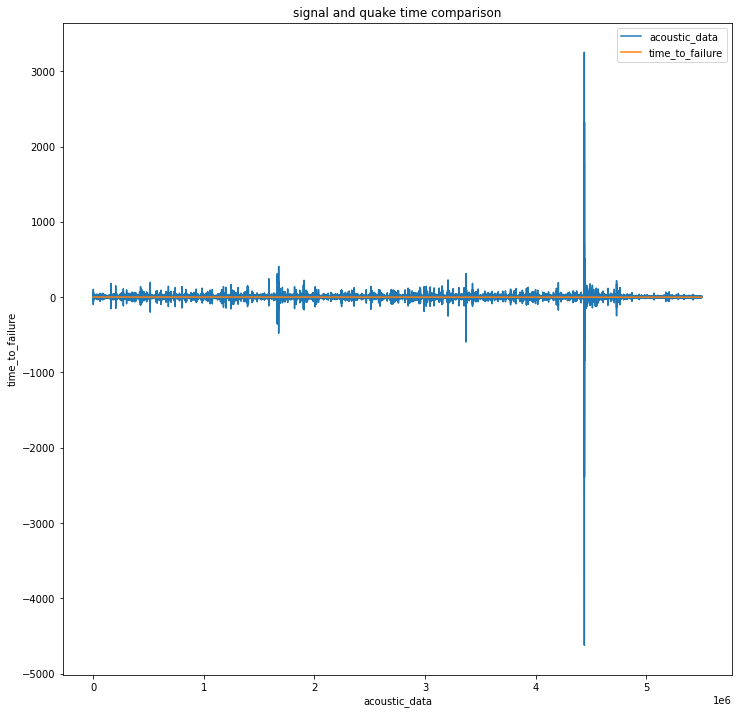

In [ ]:
#how data was before
train.plot(kind = 'line', figsize = (12,12))
plt.title('signal and quake time comparison')
plt.xlabel('acoustic_data')
plt.ylabel('time_to_failure')
plt.show()

In [ ]:
train.head(4)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691


In [ ]:
train.isnull().values.any() 


False

In [ ]:
train.values.max()

3252.0

In [ ]:
train.values.min()

-4621.0

In [ ]:
train.drop(train.head(3000000).index, inplace=True)

In [ ]:
train.shape

(2500000, 2)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1 , 1))
data = scaler.fit_transform(train)
target = train['time_to_failure']

In [ ]:
target.head(3)

3000000    0.690298
3000001    0.690298
3000002    0.690298
Name: time_to_failure, dtype: float64

In [ ]:
data

array([[ 0.1743935 ,  1.        ],
       [ 0.17413946,  1.        ],
       [ 0.17464753,  0.99999999],
       ...,
       [ 0.17540963, -0.99999999],
       [ 0.17540963, -1.        ],
       [ 0.17413946, -1.        ]])

In [ ]:
#module for training and splitting
from sklearn.model_selection import train_test_split
#
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

In [ ]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
#converting the shape in the way machine will take for training
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

Shape of X_train: (1875000, 2)
Shape of X_test: (625000, 2)
Shape of y_train: (1875000,)
Shape of y_test: (625000,)


In [ ]:
print(X_train,(X_train.shape[0],1,X_train.shape[1]))

[[[ 0.17312333  0.61972173]]

 [[ 0.17413946 -0.1214203 ]]

 [[ 0.17591769 -0.08535564]]

 ...

 [[ 0.17566366 -0.77379871]]

 [[ 0.1751556  -0.18705972]]

 [[ 0.18658707  0.75408885]]] (1875000, 1, 1)


In [ ]:
X_train.shape

(1875000, 1, 2)

In [ ]:
model = Sequential()
#time stamp on the first time step you produce output1, h0, on the second time step you produce output2 and so on.
#how many steps back in time backprop uses when calculating gradients for weight updates
# 2 columns 
model.add(LSTM(32,return_sequences=True, input_shape=(1, 2)))

#1
model.add(LSTM(16, return_sequences=True))
#2
model.add(LSTM(8))

#output layer contains 1 neuron to predict the output
model.add(Dense(1))
#model.add(out(1))
#as the data is continous, hence loss function is mean_squared_error
model.compile(loss='mse', optimizer='adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://8f72d7b9272b.ngrok.io


In [ ]:
tbcallbacks = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                        write_images=True)

In [ ]:

model.fit(X_train, y_train, epochs=5, batch_size=10000, verbose=1,validation_data=(X_test, y_test),callbacks=[tbcallbacks])


Train on 1875000 samples, validate on 625000 samples




Epoch 1/5
1875000/1875000 [==============================] - 8s 4us/step - loss: 0.0457 - val_loss: 3.3436e-04

Epoch 2/5
1875000/1875000 [==============================] - 7s 4us/step - loss: 1.8037e-04 - val_loss: 7.6057e-05
Epoch 3/5
1875000/1875000 [==============================] - 6s 3us/step - loss: 4.9601e-05 - val_loss: 3.8519e-05
Epoch 4/5
1875000/1875000 [==============================] - 7s 4us/step - loss: 3.6197e-05 - val_loss: 3.4336e-05
Epoch 5/5
1875000/1875000 [==============================] - 7s 4us/step - loss: 3.2251e-05 - val_loss: 3.0199e-05


In [ ]:
model.save('/content/drive/My Drive/model.h5')
##################################

In [ ]:
#model_save_name = 'FYP FINAL.pt'
#path = F"/content/drive/My Drive/Model/{model_save_name}" 
#torch.save(model.load_weights('/content/drive/My Drive/Mount/epochs:009.hdf5'), path)

In [ ]:
#model.load_weights('/content/drive/My Drive/Mount/epochs:009.hdf5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 32)             4480      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 16)             3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,425
Trainable params: 8,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#prediction using X_test
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score: %.2f RMSE' % (testScore))

Root mean square error Test Score: 0.01 RMSE


In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 99900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

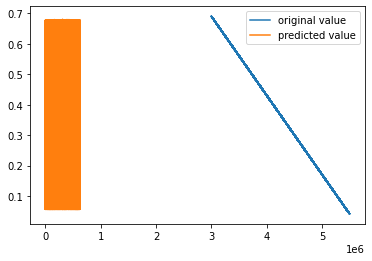

In [ ]:
plt.plot(y_test)
plt.plot(Predict)
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()